## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

Below I will use the dropna function to drop all the NaN missing values. 

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

Below I will use the str.replace function so that the data will be convereted to a numberical value in order to allow for proper analysis. I will do this for both data frames.


In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp.dtypes

C:\Users\hmill\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [8]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.dtypes

C:\Users\hmill\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

Now that I have removed the "$" from the close columns of both data frames, I need to convert it to a float type. I will do this using the astype function.

In [9]:
# Convert the Close data type to a float
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [10]:
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

Its important to remove duplicated data to perform a proper analysis. First we want to check to see if there are duplicates and how many using the the duplicated.sum function.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

472 duplicates found in the bitstamp data frame. I will use the drop_duplicates function to remove them to further clean up the data for analysis.

In [12]:
bitstamp = bitstamp.drop_duplicates()

Now I will check for duplicates again.

In [13]:
bitstamp.duplicated().sum()

0

I will now repeat the process for the coinbase data frame. 

In [14]:
coinbase.duplicated().sum()

217

In [15]:
coinbase = coinbase.drop_duplicates()

In [16]:
coinbase.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame. See above!!!!!!

In [17]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


Now I need to slice the data so we can compare a more targeted data, the close price, based on a time stamp range.

In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

Now I will get the summary of the dataframes. 

In [20]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [21]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


Most people do better when they can visually see the data. Below I will create graphs for "bitsamp" and "coinbase". 

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

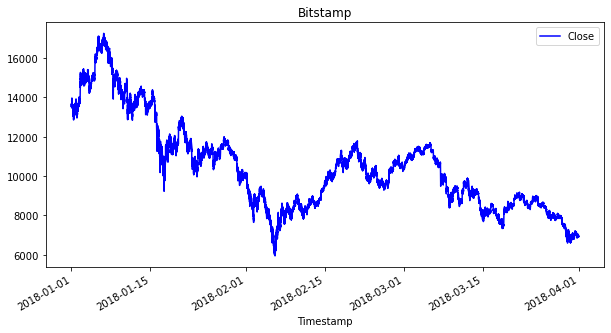

In [22]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10, 5), title="Bitstamp", color="blue")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

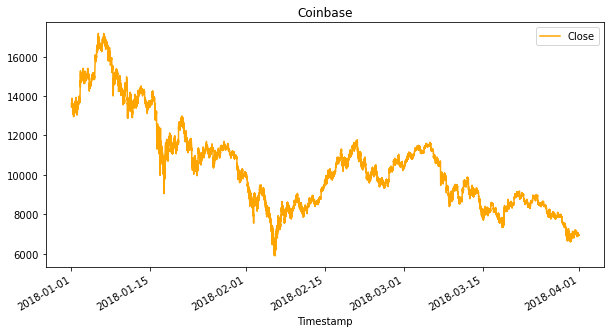

In [23]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10, 5), title="Coinbase", color="orange")

Now I will over lay these two charts to make the splits more notaciable. 

<AxesSubplot:title={'center':'Bitsamp v. Coinbase'}, xlabel='Timestamp'>

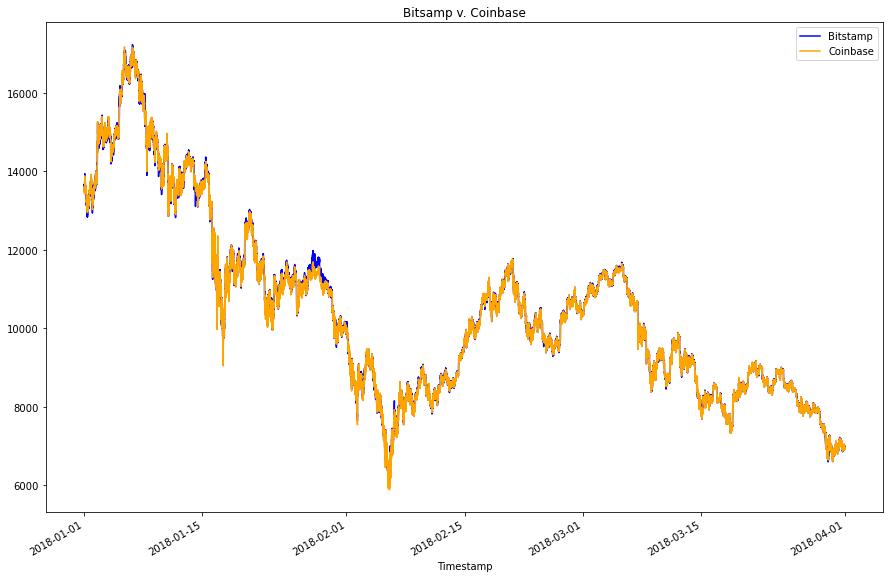

In [24]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 10), title="Bitsamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

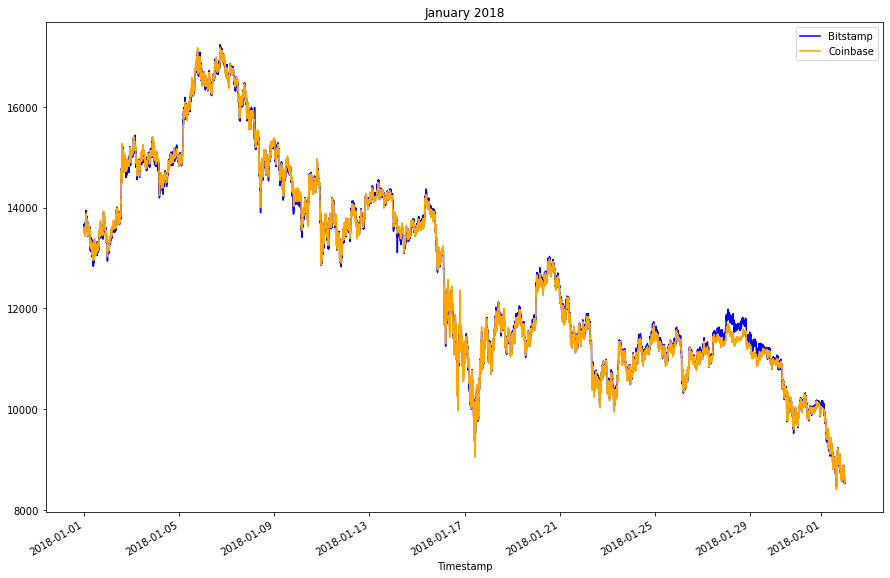

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
bitstamp_sliced['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'March 2018'}, xlabel='Timestamp'>

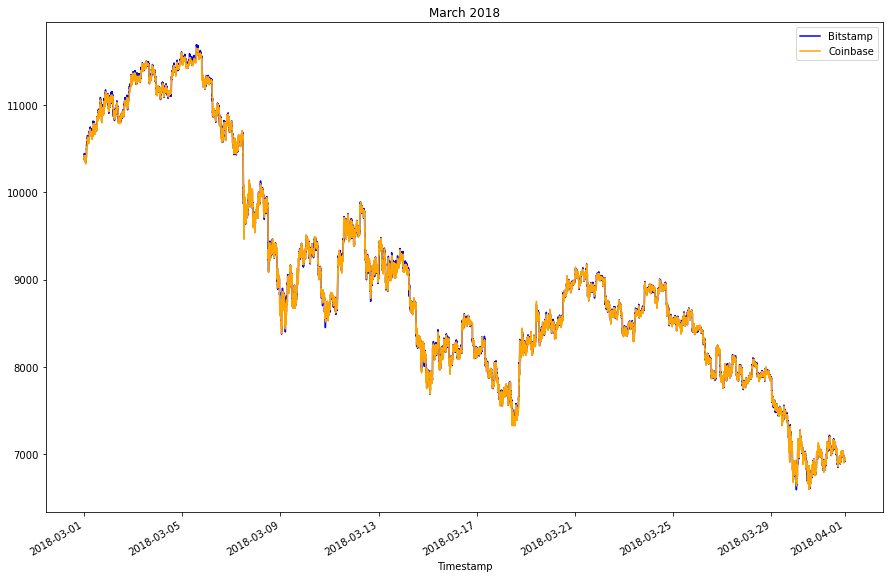

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The spread has gotten much closer as more investors exploited the arbitrage oppertunities. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

The above charts reflect data over a month period. Below we will take it down to a day based on 3 periods over the data set. This will give us a much better understanding for how arbitrage has changed over time. 

<AxesSubplot:title={'center':'01/01/18'}, xlabel='Timestamp'>

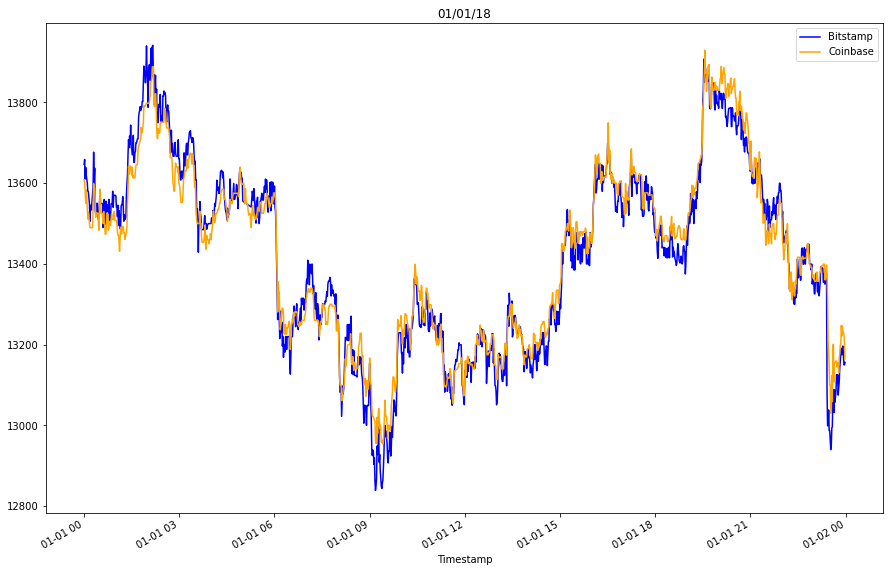

In [27]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
bitstamp_sliced['Close'].loc['2018-01-01'].plot(
    legend=True, figsize=(15, 10), title="01/01/18", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

Now we will compare bitstamp v coinbase on 1/1/18 to see what the spread was.

In [28]:
bitstamp_sliced_early = bitstamp_sliced['Close'].loc['2018-01-01']
bitstamp_sliced_early.describe()

count     1421.000000
mean     13419.823033
std        231.798180
min      12839.050000
25%      13227.060000
50%      13441.270000
75%      13590.850000
max      13941.490000
Name: Close, dtype: float64

In [29]:
coinbase_sliced_early = coinbase_sliced['Close'].loc['2018-01-01']
coinbase_sliced_early.describe()

count     1440.000000
mean     13426.872153
std        214.965851
min      12954.000000
25%      13244.997500
50%      13464.160000
75%      13575.090000
max      13929.540000
Name: Close, dtype: float64

I used the describe function of each exchange for 01/01/18 in order to establish which exchange was trading higher on that day based on the mean. This will allow me to perfomr a proper analysis. 

In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-01'] - bitstamp_sliced['Close'].loc['2018-01-01']
arbitrage_spread_early.describe()

count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:>

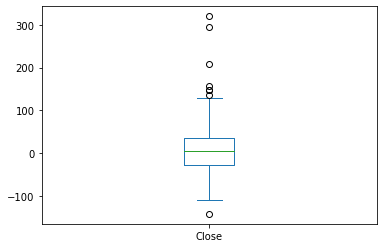

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

Now lets take a look at a day in the middle of the data set. We will use 2/15/18.

I will perfomr the same comparision I did for the early dataset by using the .describe function to show the statistics of each exchange on that day to determine which exchange was trading higher. 

In [32]:
bitstamp_sliced_mid = bitstamp_sliced['Close'].loc['2018-02-15']
bitstamp_sliced_mid.describe()

count     1440.000000
mean      9930.236535
std        196.232293
min       9500.000000
25%       9743.000000
50%       9914.490000
75%      10107.452500
max      10298.000000
Name: Close, dtype: float64

In [33]:
coinbase_sliced_mid = coinbase_sliced['Close'].loc['2018-02-15']
coinbase_sliced_mid.describe()

count     1440.000000
mean      9924.476528
std        195.447618
min       9502.100000
25%       9734.010000
50%       9909.945000
75%      10098.247500
max      10307.680000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'02/15/18'}, xlabel='Timestamp'>

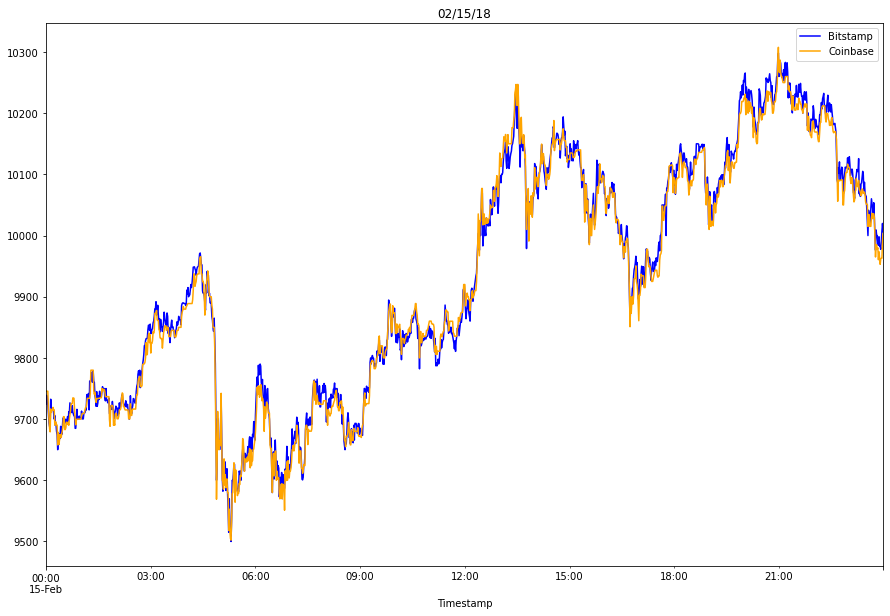

In [34]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
bitstamp_sliced['Close'].loc['2018-02-15'].plot(
    legend=True, figsize=(15, 10), title="02/15/18", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-15'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [35]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-15'] - bitstamp_sliced['Close'].loc['2018-02-15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:>

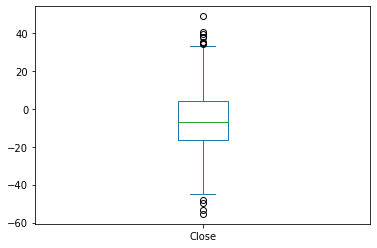

In [36]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

Based on the data you can see the spreads are gettign closer. Below we will take a look at a day from later on in the dataset. 

<AxesSubplot:title={'center':'03/28/15'}, xlabel='Timestamp'>

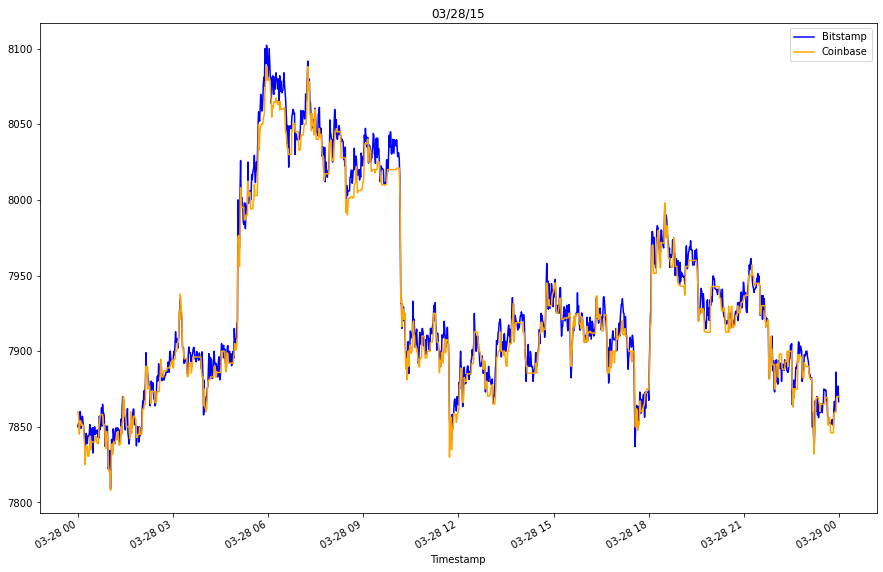

In [37]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
bitstamp_sliced['Close'].loc['2018-03-28'].plot(
    legend=True, figsize=(15, 10), title="03/28/15", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [38]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-28'] - bitstamp_sliced['Close'].loc['2018-03-28']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean       -4.42427
std         7.44509
min       -28.73000
25%        -8.99000
50%        -4.53500
75%         0.48000
max        26.30000
Name: Close, dtype: float64

<AxesSubplot:>

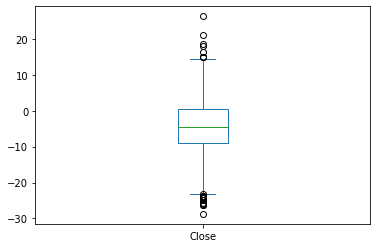

In [39]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

As you can see the spread has been tightening making it more difficult to take advanateg of the these arbitrage oppertunities

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

We calculated the spread in the section above. I will summerize all 3 of them below so they are easier to compare accross the date ranges.

In [40]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

In [41]:
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

In [42]:
arbitrage_spread_late.describe()

count    1438.00000
mean       -4.42427
std         7.44509
min       -28.73000
25%        -8.99000
50%        -4.53500
75%         0.48000
max        26.30000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

Now that we have the spreads for each of the date ranges we need to calculate the returns, so we can see how much we would/will make. To do that we take the spreads greater than "0" and devide them by the close price of the exchange we are guying from. 

In [43]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced['Close'].loc['2018-01-01']
spread_return_early = spread_return_early.dropna()
# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-01 00:21:00    0.001852
2018-01-01 00:24:00    0.000371
2018-01-01 00:26:00    0.000423
2018-01-01 00:30:00    0.000594
2018-01-01 00:31:00    0.000886
                         ...   
2018-01-01 23:55:00    0.002673
2018-01-01 23:56:00    0.004239
2018-01-01 23:57:00    0.005579
2018-01-01 23:58:00    0.003959
2018-01-01 23:59:00    0.000677
Name: Close, Length: 782, dtype: float64

In [44]:
spread_return_mid = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced['Close'].loc['2018-02-15']
spread_return_mid = spread_return_mid.dropna()
spread_return_mid

Timestamp
2018-02-15 00:00:00    0.002190
2018-02-15 00:01:00    0.000691
2018-02-15 00:02:00    0.000990
2018-02-15 00:03:00    0.002178
2018-02-15 00:04:00    0.000740
                         ...   
2018-02-15 23:31:00    0.000813
2018-02-15 23:32:00    0.002890
2018-02-15 23:33:00    0.001504
2018-02-15 23:42:00    0.000445
2018-02-15 23:45:00    0.000120
Name: Close, Length: 466, dtype: float64

In [45]:
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced['Close'].loc['2018-03-28']
spread_return_late = spread_return_late.dropna()
spread_return_late

Timestamp
2018-03-28 00:00:00    0.001268
2018-03-28 00:01:00    0.000893
2018-03-28 00:02:00    0.000245
2018-03-28 00:06:00    0.000624
2018-03-28 00:29:00    0.000931
                         ...   
2018-03-28 23:37:00    0.000156
2018-03-28 23:38:00    0.001428
2018-03-28 23:41:00    0.000469
2018-03-28 23:42:00    0.000391
2018-03-28 23:59:00    0.000428
Name: Close, Length: 406, dtype: float64

As more and more investors enter the market the returns are getting smaller and smaller. I would advise to explore other arbitrage oppertunites; perhaps the spread between Coke and Pepsi. Or John Deere and Caterpillar.

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

Now we will calculate the trades that will yeild us more the 1% to cover our expense threshhold. 

In [46]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-01 09:10:00    0.011455
2018-01-01 23:25:00    0.022465
2018-01-01 23:26:00    0.024616
2018-01-01 23:27:00    0.015948
2018-01-01 23:28:00    0.011261
Name: Close, dtype: float64

In [47]:
profitable_trades_middle = spread_return_mid[spread_return_mid > .01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [48]:
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

As you can see, we would only be profitable in the early time period.

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [49]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    7.000000
mean     0.015453
std      0.005833
min      0.010427
25%      0.011358
50%      0.012001
75%      0.019207
max      0.024616
Name: Close, dtype: float64

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [50]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-01']

# Drop any missing values from the profit DataFrame
profit_early = profit_early.dropna()

# View the early profit DataFrame
profit_early

Timestamp
2018-01-01 09:10:00    147.33
2018-01-01 23:25:00    293.89
2018-01-01 23:26:00    319.99
2018-01-01 23:27:00    207.33
2018-01-01 23:28:00    146.82
2018-01-01 23:29:00    155.86
2018-01-01 23:31:00    135.18
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [51]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe()

count      7.000000
mean     200.914286
std       76.390469
min      135.180000
25%      147.075000
50%      155.860000
75%      250.610000
max      319.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - 01-01-18'}, xlabel='Timestamp'>

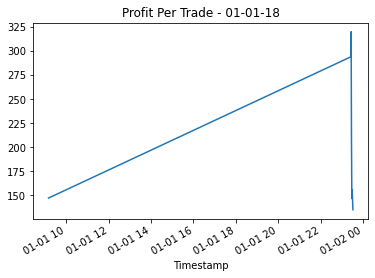

In [52]:
# Plot the results for the early profit per trade DataFrame
profit_early.plot(title = 'Profit Per Trade - 01-01-18')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

Now I will find the total profits that could have been realized.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early.sum()

1406.3999999999996

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [54]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()

<AxesSubplot:title={'center':'cumulative profit'}, xlabel='Timestamp'>

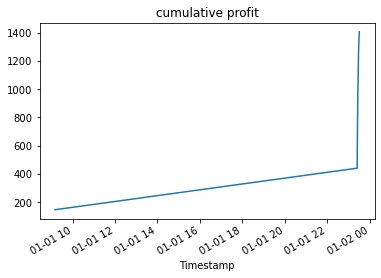

In [55]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title= 'cumulative profit')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** As more investors entered the market the oppertunites got devalued to the point of not being profitable. Which you can see as the means drop from early to late. As I mentioned it would be a good idea to look at other arbitrage oppertunities. 